In [1]:
import os
# Change path to general folder
path = "C:/Users/gregg/OneDrive/Senior Year/MGT-411"
os.chdir(path)


In [2]:
from Code.Trading.volTradeClass import volTrade

c:\users\gregg\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
tickers = ["SPY","XLK","XLF","XLY","XLV","XLI"]
start_date = "2015-01-01"


try_vols = volTrade(tickers,start_date)

data1 = try_vols.optionSeries()

option_prices, option_ivs=try_vols.all_expTS(data=data1)

all_portfolios = try_vols.dispersionTest(option_prices)
all_returns = list(all_portfolios["Returns"].values())

SPY


C:\Users\gregg\OneDrive\Senior Year\MGT-411\Code\Trading\volTradeClass.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\gregg\OneDrive\Senior Year\MGT-411\Code\Trading\volTradeClass.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\gregg\OneDrive\Senior Year\MGT-411\Code\Trading\volTradeClass.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  xm = ((x1 * bsm_zero(S,K,T,r,x2,option_price,option_type) - x2 * bsm_zero(S,K,T,r,x1,option_price,option_type)) /
C:\Users\gregg\OneDrive\Senior Year\MGT-411\Code\Trading\volTradeClass.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  x0 = ((x1 * bsm_zero(S,K,T,r,x2,option_price,option_type) - x2 * bsm_zero(S,K,T,r,x1,option_price,option_type)) /
C:\Users\gregg\OneDrive\Senior Year\MGT-411\Code\Trading\volTr

XLK
XLF
XLY
XLV
XLI


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr

In [9]:
np.mean(all_returns)
np.std(all_returns)

0.574133696572494

In [17]:
trial = all_portfolios["Series"]["2018-03-16"]
cum_returns = (trial+1).cumprod() - 1

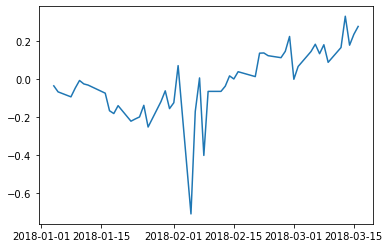

In [18]:
plt.plot(cum_returns)

In [41]:
trial = all_portfolios["Series"]["2020-08-21"]
cum_returns = (trial+1).cumprod() - 1

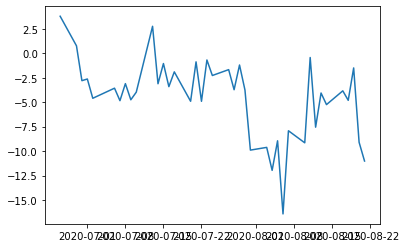

In [28]:
len(cum_returns)

40

In [39]:
start_date = "2020-06-25"
end_date = "2020-08-21"
df = pdr.DataReader(["SPY","VXX"], "yahoo",start_date,end_date)["Close"].dropna()
df_returns = (np.log(df) - np.log(df.shift(1))).dropna()
df_cum_returns = (df_returns+1).cumprod()-1

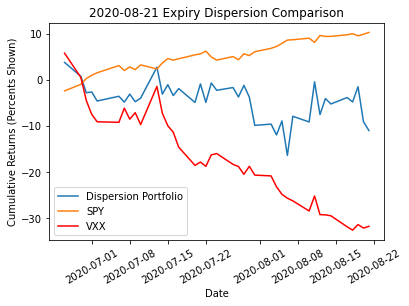

In [51]:
plt.plot(cum_returns*100,label = "Dispersion Portfolio")
plt.plot(df_cum_returns["SPY"]*100,label = "SPY")
plt.plot(df_cum_returns["VXX"]*100, label = "VXX", color = "red")
plt.legend()
plt.xlabel("Date")
plt.title("2020-08-21 Expiry Dispersion Comparison")
plt.ylabel("Cumulative Returns (Percents Shown)")
plt.xticks(rotation=30)
plt.show()

In [68]:
all_means = []
all_sd = []
for key in all_portfolios["Series"].keys():
    temp_series = all_portfolios["Series"][key]
    if np.isnan(temp_series.mean()) or np.isnan(temp_series.std()):
        continue
    else:
        all_means.append(temp_series.mean()*252)
        all_sd.append(temp_series.std()*np.sqrt(252))

all_means = np.array(all_means)
all_sd = np.array(all_sd)

In [69]:
all_means.mean()

4.1549794218768445

In [70]:
all_sd.mean()

3.8543308990759164

In [74]:
df_returns["dispersion"] = trial

In [78]:
df_returns.corr()

Symbols,SPY,VXX,dispersion
Symbols,,,
SPY,1.000000,-0.805602,-0.396501
VXX,-0.805602,1.000000,0.507630
dispersion,-0.396501,0.507630,1.000000
